In [9]:
from nltk.tokenize import word_tokenize
import nltk
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [10]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [11]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'me': False,
   'her': False,
   'you': True,
   'like': True,
   'hate': False,
   'i': True},
  'pos'),
 ({'me': False,
   'her': False,
   'you': True,
   'like': False,
   'hate': True,
   'i': True},
  'neg'),
 ({'me': True,
   'her': False,
   'you': True,
   'like': True,
   'hate': False,
   'i': False},
  'neg'),
 ({'me': False,
   'her': True,
   'you': False,
   'like': True,
   'hate': False,
   'i': True},
  'pos')]

In [12]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [13]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'me': False,
 'her': False,
 'you': False,
 'like': True,
 'hate': False,
 'i': True}

In [14]:
classifier.classify(test_sent_features)

'pos'

In [18]:
# Textblob 설치
! pip install -U textblob nltk

  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.2
    Uninstalling nltk-3.6.2:
      Successfully uninstalled nltk-3.6.2


In [19]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

train = [
    ('I love this sandwich.', 'pos'),
    ('This is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('This is my best work.', 'pos'),
    ("What an awesome view", 'pos'),
    ('I do not like this restaurant', 'neg'),
    ('I am tired of this stuff.', 'neg'),
    ("I can't deal with this", 'neg'),
    ('He is my sworn enemy!', 'neg'),
    ('My boss is horrible.', 'neg')
]
test = [
    ('The beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')
]

In [20]:
import nltk
nltk.download('punkt')

cl = NaiveBayesClassifier(train)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82103\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
cl.classify("Their burgers are amazing")  # "pos"

'pos'

In [22]:
cl.classify("I don't like their pizza.")  # "neg"

'neg'

In [23]:
from textblob import TextBlob
blob = TextBlob("The beer was amazing. "
                "But the hangover was horrible. My boss was not happy.",
                classifier=cl)
blob.classify()  # "neg"  

'neg'

In [24]:
for sentence in blob.sentences:
    print(sentence)
    print(sentence.classify())
# "pos", "neg", "neg"

The beer was amazing.
pos
But the hangover was horrible.
neg
My boss was not happy.
neg


In [25]:
cl.accuracy(test)

0.8333333333333334

In [26]:
cl.show_informative_features(5)

Most Informative Features
          contains(this) = True              neg : pos    =      2.3 : 1.0
          contains(this) = False             pos : neg    =      1.8 : 1.0
          contains(This) = False             neg : pos    =      1.6 : 1.0
            contains(an) = False             neg : pos    =      1.6 : 1.0
             contains(I) = False             pos : neg    =      1.4 : 1.0


In [27]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

C:\Users\82103\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [28]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [29]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'지루해': False,
   '메리가': True,
   '메리는': False,
   '이쁜': False,
   '메리랑': False,
   '고양이도': False,
   '난': False,
   '좋아': True,
   '놀거야': False,
   '수업이': False,
   '마치고': False,
   '고양이야': False},
  'pos'),
 ({'지루해': False,
   '메리가': False,
   '메리는': False,
   '이쁜': False,
   '메리랑': False,
   '고양이도': True,
   '난': False,
   '좋아': True,
   '놀거야': False,
   '수업이': False,
   '마치고': False,
   '고양이야': False},
  'pos'),
 ({'지루해': True,
   '메리가': False,
   '메리는': False,
   '이쁜': False,
   '메리랑': False,
   '고양이도': False,
   '난': True,
   '좋아': False,
   '놀거야': False,
   '수업이': True,
   '마치고': False,
   '고양이야': False},
  'neg'),
 ({'지루해': False,
   '메리가': False,
   '메리는': True,
   '이쁜': True,
   '메리랑': False,
   '고양이도': False,
   '난': False,
   '좋아': False,
   '놀거야': False,
   '수업이': False,
   '마치고': False,
   '고양이야': True},
  'pos'),
 ({'지루해': False,
   '메리가': False,
   '메리는': False,
   '이쁜': False,
   '메리랑': True,
   '고양이도': False,
   '난': True,
   '좋아': False,
   '놀거야': True,
   '수업이': F

In [30]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [31]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'지루해': False,
 '메리가': False,
 '메리는': False,
 '이쁜': False,
 '메리랑': True,
 '고양이도': False,
 '난': True,
 '좋아': False,
 '놀거야': True,
 '수업이': True,
 '마치고': False,
 '고양이야': False}

In [32]:
classifier.classify(test_sent_features)

'neg'

In [33]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

train = [
    ('나는 이 샌드위치를 정말 좋아해.', '긍정'),
    ('정말 멋진 곳이에요!', '긍정'),
    ('나는 이 맥주들이 아주 좋다고 생각해요.', '긍정'),
    ('이것은 나의 최고의 작품입니다.', '긍정'),
    ("정말 멋진 광경이다", "긍정"),
    ('난 이 식당 싫어', '부정'),
    ('난 이게 지겨워.', '부정'),
    ("이 문제는 처리할 수 없습니다.", "부정"),
    ('그는 나의 불구대천의 원수이다.', '부정'),
    ('내 상사는 끔찍해.', '부정')
]

test = [
    ('맥주가 좋았습니다.', '긍정'),
    ('난 내 일을 즐기지 않는다', '부정'),
    ('오늘은 기분이 안 좋아요.', '부정'),
    ('놀라워요!', '긍정'),
    ('네드는 나의 친구입니다.', '긍정'),
    ('제가 이렇게 하고 있다니 믿을 수가 없어요.', '부정')
]

In [34]:
cl = NaiveBayesClassifier(train)
cl.show_informative_features()

Most Informative Features
            contains(정말) = False              부정 : 긍정     =      2.2 : 1.0
            contains(나는) = False              부정 : 긍정     =      1.6 : 1.0
             contains(난) = False              긍정 : 부정     =      1.6 : 1.0
            contains(멋진) = False              부정 : 긍정     =      1.6 : 1.0
          contains(곳이에요) = False              부정 : 긍정     =      1.2 : 1.0
          contains(광경이다) = False              부정 : 긍정     =      1.2 : 1.0
            contains(그는) = False              긍정 : 부정     =      1.2 : 1.0
           contains(끔찍해) = False              긍정 : 부정     =      1.2 : 1.0
             contains(내) = False              긍정 : 부정     =      1.2 : 1.0
          contains(맥주들이) = False              부정 : 긍정     =      1.2 : 1.0


In [35]:
cl.accuracy(test)

0.5

In [36]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

In [37]:
train_data = [(['/'.join(token) for token in pos_tagger.pos(sentence)], result) for [sentence, result] in train]
train_data

[(['나/Noun',
   '는/Josa',
   '이/Noun',
   '샌드위치/Noun',
   '를/Josa',
   '정말/Noun',
   '좋아해/Adjective',
   './Punctuation'],
  '긍정'),
 (['정말/Noun', '멋진/Adjective', '곳/Noun', '이에요/Josa', '!/Punctuation'], '긍정'),
 (['나/Noun',
   '는/Josa',
   '이/Noun',
   '맥주/Noun',
   '들/Suffix',
   '이/Josa',
   '아주/Noun',
   '좋다고/Adjective',
   '생각/Noun',
   '해요/Verb',
   './Punctuation'],
  '긍정'),
 (['이/Determiner',
   '것/Noun',
   '은/Josa',
   '나/Noun',
   '의/Josa',
   '최고/Noun',
   '의/Josa',
   '작품/Noun',
   '입니다/Adjective',
   './Punctuation'],
  '긍정'),
 (['정말/Noun', '멋진/Adjective', '광경/Noun', '이다/Josa'], '긍정'),
 (['난/Noun', '이/Noun', '식당/Noun', '싫어/Adjective'], '부정'),
 (['난/Noun', '이/Noun', '게/Josa', '지겨워/Adjective', './Punctuation'], '부정'),
 (['이/Noun',
   '문제/Noun',
   '는/Josa',
   '처리/Noun',
   '할/Verb',
   '수/Noun',
   '없습니다/Adjective',
   './Punctuation'],
  '부정'),
 (['그/Noun',
   '는/Josa',
   '나/Noun',
   '의/Josa',
   '불구/Noun',
   '대천/Noun',
   '의/Josa',
   '원수/Noun',
   '이다/Josa',
   './Punct

In [38]:
test_data = [(['/'.join(token) for token in pos_tagger.pos(sentence)], result) for [sentence, result] in test]
cl = NaiveBayesClassifier(train_data)
cl.accuracy(test_data)

0.5

In [39]:
cl.show_informative_features()

Most Informative Features
        contains(나/Noun) = True               긍정 : 부정     =      2.3 : 1.0
       contains(정말/Noun) = False              부정 : 긍정     =      2.2 : 1.0
        contains(나/Noun) = False              부정 : 긍정     =      1.8 : 1.0
        contains(난/Noun) = False              긍정 : 부정     =      1.6 : 1.0
  contains(멋진/Adjective) = False              부정 : 긍정     =      1.6 : 1.0
        contains(는/Josa) = False              긍정 : 부정     =      1.4 : 1.0
        contains(는/Josa) = True               부정 : 긍정     =      1.4 : 1.0
        contains(이/Noun) = False              긍정 : 부정     =      1.4 : 1.0
        contains(이/Noun) = True               부정 : 긍정     =      1.4 : 1.0
        contains(것/Noun) = False              부정 : 긍정     =      1.2 : 1.0


In [40]:
def read_data(filename):
    with open(filename,'r', encoding='UTF8') as f:
        data=[line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외
        data=data[1:]
    return data

train_data=read_data('ratings_train.txt')
test_data=read_data('ratings_test.txt')

train_data

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'],
 ['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0'],
 ['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0'],
 ['9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
  '0'],
 ['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1'],
 ['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1'],
 ['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1'],
 ['10217543', '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~', '1'],
 ['5957425', '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해', '0'],
 ['8628627', '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.', '1'],
 ['9864035', '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지', '0'],
 ['6852435', 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ', '1'],
 ['9143163',
  '참 사람들 웃긴게 

In [41]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [42]:
from konlpy.tag import Okt
okt=Okt()

In [43]:
import json
import os
from pprint import pprint

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('train_docs.json'):
    with open('train_docs.json', encoding="utf-8") as f:
        train_docs = json.load(f)
    with open('test_docs.json', encoding="utf-8") as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

pprint(train_docs[0])

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0']


In [44]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


In [45]:
import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159921
49895
[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


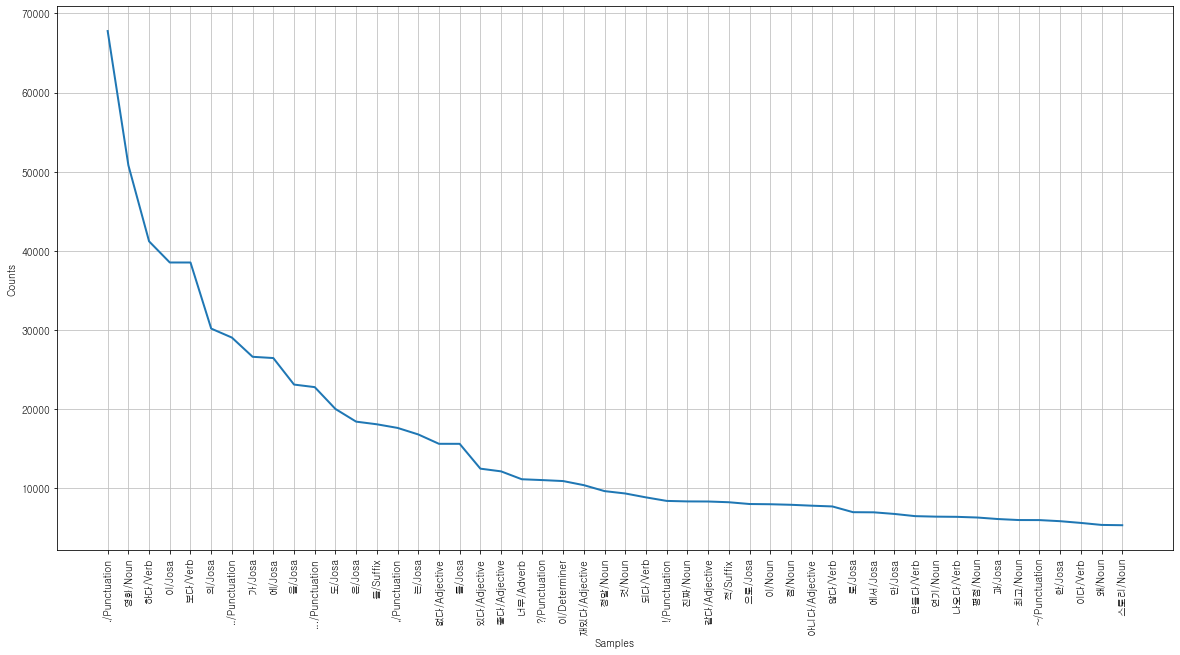

In [46]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [47]:
selected_words = [f[0] for f in text.vocab().most_common(1000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [48]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [51]:
!pip install tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached clang-5.0.tar.gz (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_auth-1.35.0-py2.py

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
pytest-astropy 0.8.0 requires pytest-doctestplus>=0.2.0, but you have pytest-doctestplus 0.0.0 which is incompatible.
flake8 3.9.0 requires pycodestyle<2.8.0,>=2.7.0, but you have pycodestyle 2.6.0 which is incompatible.
flake8 3.9.0 requires pyflakes<2.4.0,>=2.3.0, but you have pyflakes 2.2.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
pytest-astropy 0.8.0 requires pytest-doctestplus>=0.2.0, but you have pytest-doctestplus 0.0.0 which is incompatible.
flake8 3.9.0 requires pycodestyle<2.8.0,>=2.7.0, but you have pycodestyle 2.6.0 which is

  Using cached tensorflow-2.6.2-cp36-cp36m-win_amd64.whl (423.3 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.42.0-cp36-cp36m-win_amd64.whl (3.2 MB)
  Using cached protobuf-3.19.1-cp36-cp36m-win_amd64.whl (897 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.1.0-cp36-cp36m-win_amd64.whl (2.7 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached typing_extensions-3.7.4.3-py

C:\Users\82103\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
293/293 [==============================] - 2s 5ms/step - loss: 0.4317 - binary_accuracy: 0.8025
Epoch 2/10
293/293 [==============================] - 2s 5ms/step - loss: 0.3805 - binary_accuracy: 0.8249
Epoch 3/10
293/293 [==============================] - 1s 5ms/step - loss: 0.3644 - binary_accuracy: 0.8334
Epoch 4/10
293/293 [==============================] - 2s 5ms/step - loss: 0.3514 - binary_accuracy: 0.8413
Epoch 5/10
293/293 [==============================] - 1s 5ms/step - loss: 0.3398 - binary_accuracy: 0.8484
Epoch 6/10
293/293 [==============================] - 2s 5ms/step - loss: 0.3286 - binary_accuracy: 0.8547
Epoch 7/10
293/293 [==============================] - 2s 5ms/step - loss: 0.3171 - binary_accuracy: 0.8613
Epoch 8/10
293/293 [==============================] - 2s 5ms/step - loss: 0.3058 - binary_accuracy: 0.8672
Epoch 9/10
293/293 [==============================] - 2s 5ms/step - loss: 0.2942 - binary_accuracy: 0.8725
Epoch 10/10
1563/1563 [==============

In [52]:
results

[0.39911168813705444, 0.8268799781799316]

In [53]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score) * 100))

In [54]:
predict_pos_neg("올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.")
predict_pos_neg("배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.")
predict_pos_neg("주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ")
predict_pos_neg("믿고 보는 감독이지만 이번에는 아니네요")
predict_pos_neg("주연배우 때문에 봤어요")

[올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.]는 98.63% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^

[배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.]는 78.44% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;

[주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ]는 86.68% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^

[믿고 보는 감독이지만 이번에는 아니네요]는 78.33% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^

[주연배우 때문에 봤어요]는 80.08% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;

